In [1]:
import numpy as np
import pandas as pd
import pydicom

In [2]:
import os

In [8]:
data_dir = 'D:/abcd/CT images TCIA/QIN LUNG CT/'

In [9]:
patients = os.listdir(data_dir)

In [11]:
labels_df = pd.read_csv('FeaturesWithLabels (1).csv',index_col=0)

In [12]:
labels_df.head(10)

,survival_label,Longest.Diameter..mm.,Short.Axis...Longest.Diameter..mm..,Short.Axis..mm.,Mean..HU.,StdDev..HU.,Volume..cm..,X5a_3D_MacSpic_NumberOf,X8a_3D_Is_Attached_To_Pleural_Wall,X8b_3D_Relative_Border_To_Lung,...,X3D.Wavelet.decomposition...P1.L2.C3.Layer.1,X3D.Wavelet.decomposition...P1.L2.C4.Layer.1,X3D.Wavelet.decomposition...P1.L2.C5.Layer.1,X3D.Wavelet.decomposition...P1.L2.C6.Layer.1,X3D.Wavelet.decomposition...P1.L2.C7.Layer.1,X3D.Wavelet.decomposition...P1.L2.C8.Layer.1,Convexity_Mean,Conv_Area_Perim,IsAttached,Std_Conv
RID,,,,,,,,,,,,,,,,,,,,,
R0004,Long,45.50,1520.73,33.42,-20.13,136.80,33.06,0,0,0.996305,...,922.503735,7055.561581,25833.098760,8449.116111,737.184747,6172.425054,0.863500,0.642984,0.863500,0.097923
R0013,Long,41.82,617.67,14.77,-9.56,119.63,14.78,0,1,0.700097,...,717.342696,4189.960074,15237.079170,4561.750068,613.539088,3699.644891,0.845099,0.866819,0.807820,0.027609
R0017,Long,18.95,240.46,12.69,-73.58,151.36,1.76,0,1,0.895576,...,11.057679,15.946198,1585.785644,2164.498445,59.819492,491.460387,0.931435,0.918455,0.931435,0.013920
R0018,Short,35.04,1086.57,31.01,28.45,93.49,16.85,0,1,0.810430,...,494.811919,3947.601380,12430.672920,3005.110061,400.538246,3257.483750,0.917999,0.897987,0.917999,0.025730
R0019,Short,31.87,613.64,19.25,-30.00,146.40,10.97,0,1,0.624711,...,89.742340,571.684059,8299.075649,2753.117372,89.089983,381.985943,0.931737,0.946039,0.860215,0.039337
QIN-LSC-0009,Short,22.07,271.42,12.30,-8.84,120.52,3.28,0,0,1.000000,...,12.858245,128.891020,1530.667404,660.870553,12.199513,131.042865,0.944540,0.942363,0.944540,0.010290
R0022,Short,30.02,712.11,23.72,-53.68,154.00,9.81,0,0,1.000000,...,131.807404,690.246172,10825.671090,3458.537042,89.591953,522.504521,0.860291,0.810881,0.860291,0.055618
QIN-LSC-0014,Short,28.98,487.35,16.82,-64.46,144.83,6.60,0,0,1.000000,...,304.204680,68.889893,9468.276186,3536.618018,304.418609,64.491886,0.771430,0.899736,0.771430,0.108075
R0033,Short,24.21,319.89,13.21,-86.92,151.40,1.15,0,0,1.000000,...,30.681205,204.025573,4697.063260,1323.392033,29.870154,203.407723,0.853873,0.814356,0.853873,0.057747


In [15]:
for patient in patients[:1]:
    label = labels_df.get_value(patient, 'survival_label')
    path = data_dir + patient
    slices = [pydicom.read_file(path + '/' + s) for s in os.listdir(path)]
    slices.sort(key = lambda x: int(x.ImagePositionPatient[2]))
    print(len(slices),label)
    print(slices[0])

C:\Users\varun-sharma\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  from ipykernel import kernelapp as app


150 Short
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL', 'CT_SOM5 SPI']
(0008, 0016) SOP Class UID                       UI: CT Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.3.6.1.4.1.14519.5.2.1.4320.7007.893010376477159646367115045026
(0008, 0020) Study Date                          DA: '20000913'
(0008, 0021) Series Date                         DA: '20000913'
(0008, 0022) Acquisition Date                    DA: '20000913'
(0008, 0023) Content Date                        DA: '20000913'
(0008, 0030) Study Time                          TM: '160529.0000'
(0008, 0031) Series Time                         TM: '161149.0000'
(0008, 0032) Acquisition Time                    TM: '161327.381284'
(0008, 0033) Content Time                        TM: '161327.381284'
(0008, 0040) Data Set Type                       US: 0
(0008, 0041) Data Set Subtype                    LO:

In [16]:
len(patients)

40

In [17]:
import matplotlib.pyplot as plt

C:\Users\varun-sharma\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  from ipykernel import kernelapp as app


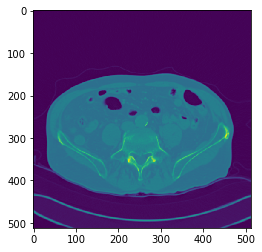

In [19]:
for patient in patients[:1]:
    label = labels_df.get_value(patient, 'survival_label')
    path = data_dir + patient
    slices = [pydicom.read_file(path + '/' + s) for s in os.listdir(path)]
    slices.sort(key = lambda x: int(x.ImagePositionPatient[2]))
    plt.imshow(slices[0].pixel_array)
    plt.show()

In [20]:
import cv2

C:\Users\varun-sharma\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  app.launch_new_instance()


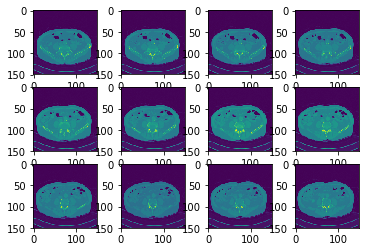

In [21]:
IMG_PX_SIZE = 150
for patient in patients[:1]:
    label = labels_df.get_value(patient, 'survival_label')
    path = data_dir + patient
    slices = [pydicom.read_file(path + '/' + s) for s in os.listdir(path)]
    slices.sort(key = lambda x: int(x.ImagePositionPatient[2]))
    
    fig = plt.figure()
    for num,each_slice in enumerate(slices[:12]):
        y = fig.add_subplot(3,4,num+1)
        new_image = cv2.resize(np.array(each_slice.pixel_array),(IMG_PX_SIZE,IMG_PX_SIZE))
        plt.imshow(new_image)
    plt.show()

In [23]:
for patient in patients[:5]:
    label = labels_df.get_value(patient, 'survival_label')
    path = data_dir + patient
    slices = [pydicom.read_file(path + '/' + s) for s in os.listdir(path)]
    slices.sort(key = lambda x: int(x.ImagePositionPatient[2]))
    print(len(slices), slices[0].pixel_array.shape)

C:\Users\varun-sharma\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  from ipykernel import kernelapp as app


150 (512, 512)
109 (512, 512)
103 (512, 512)
68 (512, 512)
67 (512, 512)


In [25]:
HM_SLICES = 20
import math


def chunks(l, n):
    # Credit: Ned Batchelder
    # Link: http://stackoverflow.com/questions/312443/how-do-you-split-a-list-into-evenly-sized-chunks
    """Yield successive n-sized chunks from l."""
    for i in range(0, len(l), n):
        yield l[i:i + n]

def mean(l):
    return sum(l) / len(l)

In [36]:
for patient in patients[0:]:
    label = labels_df.get_value(patient, 'survival_label')
    path = data_dir + patient
    slices = [pydicom.read_file(path + '/' + s) for s in os.listdir(path)]
    slices.sort(key = lambda x: int(x.ImagePositionPatient[2]))
    new_slices = []
    slices = [cv2.resize(np.array(each_slice.pixel_array),(IMG_PX_SIZE,IMG_PX_SIZE)) for each_slice in slices]
    chunk_sizes = math.ceil(len(slices) / HM_SLICES)
    for slice_chunk in chunks(slices, chunk_sizes):
        slice_chunk = list(map(mean, zip(*slice_chunk)))
        new_slices.append(slice_chunk)

    print(len(slices), len(new_slices))
def process_data(patient,labels_df,img_px_size=50, hm_slices=20, visualize=False):

C:\Users\varun-sharma\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  from ipykernel import kernelapp as app


150 19
109 19
103 18
68 17
67 17
70 18
63 16
63 16
80 20
67 17
92 19
62 16
63 16
69 18
81 17
62 16
80 20
73 19
88 18
75 19
75 19
66 17
78 20
71 18
68 17
93 19
87 18
77 20
75 19
68 17
69 18
76 19
92 19
170 19
67 17
58 20
62 16
69 18
62 16
74 19


C:\Users\varun-sharma\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  app.launch_new_instance()


150 20


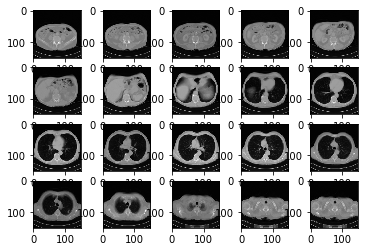

109 20


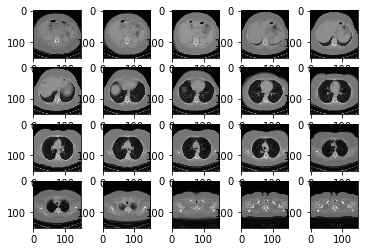

103 20


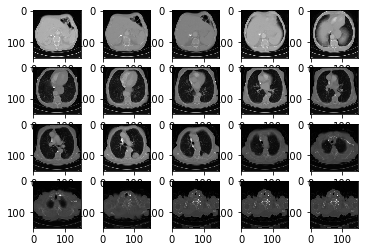

68 20


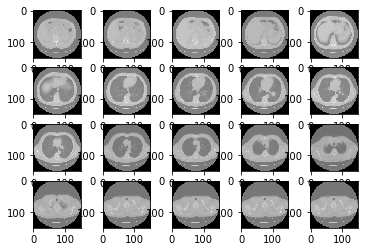

67 20


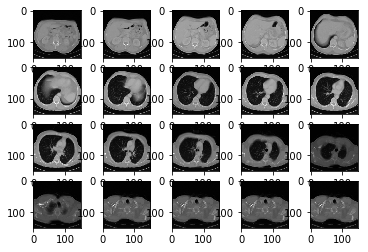

70 20


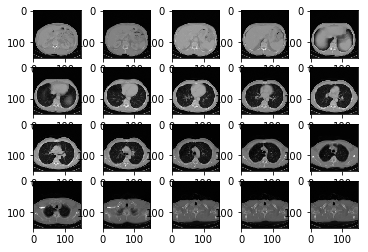

63 20


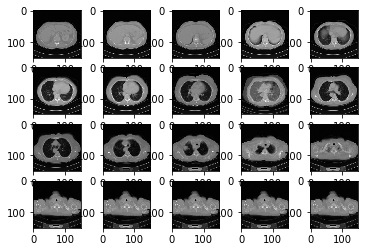

63 20


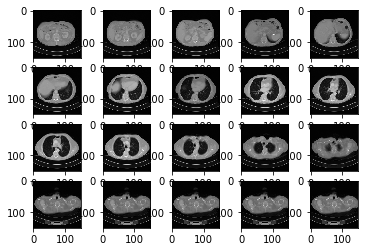

80 20


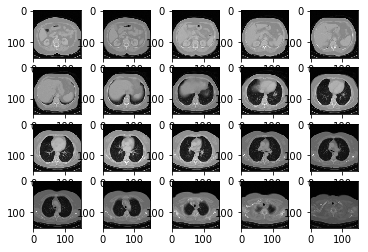

67 20


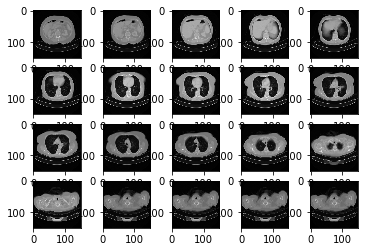

In [38]:
for patient in patients[:10]:
    try:
        label = labels_df.get_value(patient, 'survival_label')
        path = data_dir + patient
        slices = [pydicom.read_file(path + '/' + s) for s in os.listdir(path)]
        slices.sort(key = lambda x: int(x.ImagePositionPatient[2]))
        new_slices = []

        slices = [cv2.resize(np.array(each_slice.pixel_array),(IMG_PX_SIZE,IMG_PX_SIZE)) for each_slice in slices]

        chunk_sizes = math.ceil(len(slices) / HM_SLICES)


        for slice_chunk in chunks(slices, chunk_sizes):
            slice_chunk = list(map(mean, zip(*slice_chunk)))
            new_slices.append(slice_chunk)

        if len(new_slices) == HM_SLICES-1:
            new_slices.append(new_slices[-1])

        if len(new_slices) == HM_SLICES-2:
            new_slices.append(new_slices[-1])
            new_slices.append(new_slices[-1])
            
        if len(new_slices) == HM_SLICES-3:
            new_slices.append(new_slices[-1])
            new_slices.append(new_slices[-1])
            new_slices.append(new_slices[-1])
            
        if len(new_slices) == HM_SLICES-4:
            new_slices.append(new_slices[-1])
            new_slices.append(new_slices[-1])
            new_slices.append(new_slices[-1])
            new_slices.append(new_slices[-1])

       
        print(len(slices), len(new_slices))
    except Exception as e:
        # again, some patients are not labeled, but JIC we still want the error if something
        # else is wrong with our code
        print(str(e))
    fig = plt.figure()
    for num,each_slice in enumerate(new_slices):
        y = fig.add_subplot(4,5,num+1)
        y.imshow(each_slice, cmap='gray')
    plt.show()

In [39]:
if label == 'Short': label=np.array([0,1])
elif label == 'Long': label=np.array([1,0])
        
final_label = np.array(new_slices),label

In [41]:
final_label[0]

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [42]:
IMG_SIZE_PX = 50
much_data = []
for num,patient in enumerate(patients):
    if num % 100 == 0:
        print(num)
    try:
        img_data,label = process_data(patient,labels,img_px_size=IMG_SIZE_PX, hm_slices=HM_SIZE)
        #print(img_data.shape,label)
        much_data.append([img_data,label])
    except KeyError as e:
        print('This is unlabeled data!')

np.save('muchdata-{}-{}-{}.npy'.format(IMG_SIZE_PX,IMG_SIZE_PX,HM_SIZE), much_data)

0


NameError: name 'process_data' is not defined